In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:\\Users\\John\\Desktop\\PGA15')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from nltk.corpus import stopwords

In [4]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, label_binarize

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
df = pd.read_csv('US_Accidents_Dec20.csv')

In [11]:
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


# Parameters Explanations

ID: Thisis a unique identifier of the accident record.

Source: Indicates source of the accident report (i.e. the API which reported the accident.).

TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

Severity: Shows the severity of the accident, a number between 1 and 4, where 
    1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 
    4 indicates a significant impact on traffic (i.e., long delay).
    
Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordinate of the end point.

End_Lng: Shows longitude in GPS coordinate of the end point.

Distance(mi): The length of the road extent affected by the accident.

Description: Shows natural language description of the accident.

Number: Shows the street number in address field.

Street: Shows the street name in address field.

Side: Shows the relative side of the street (Right/Left) in address field.

City: Shows the city in address field.

County: Shows the county in address field.

State: Shows the state in address field.

Zipcode: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station in a nearby location.

Stop: A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunse: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

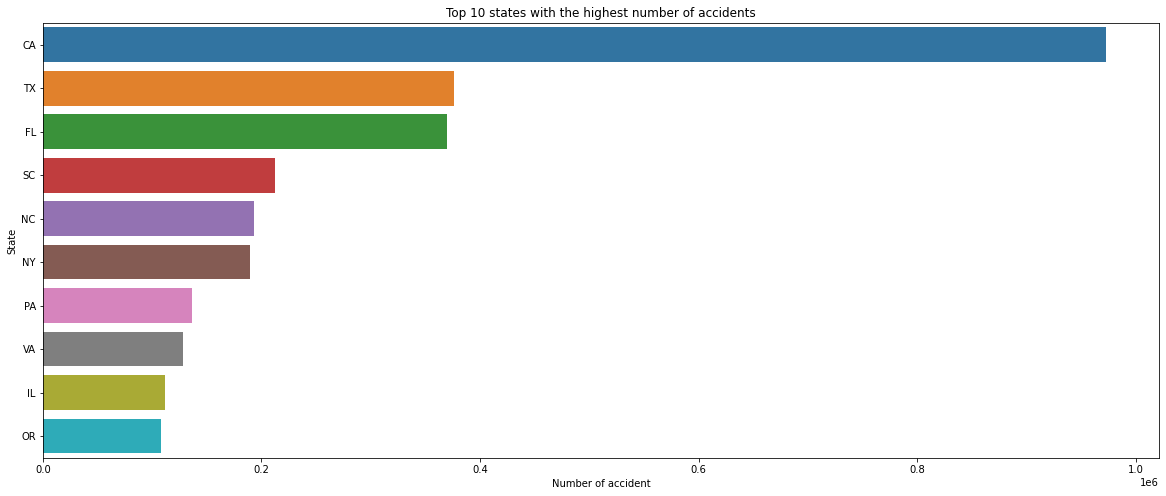

In [12]:
plt.figure(figsize=(20, 8))
plt.title("Top 10 states with the highest number of accidents")
state_counts = df["State"].value_counts()
sns.barplot(state_counts[:10].values, state_counts[:10].index, orient="h")
plt.xlabel("Number of accident")
plt.ylabel("State")
plt.show()

# Most frequent words in the description of an accident with severity 4

We are going to compute the most frequent words in the description column of the accidents with a value of severity equal to 4, using some stopwords from the english language.

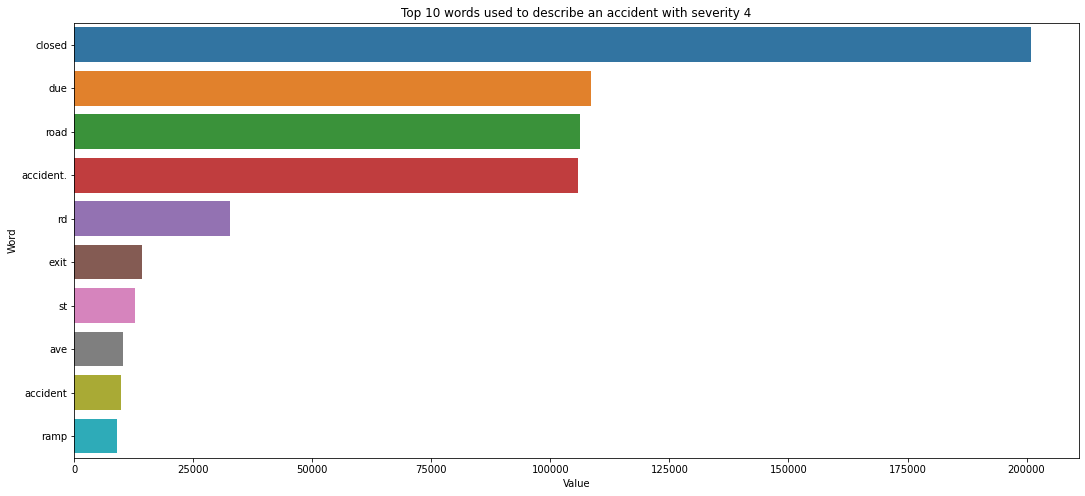

In [13]:
stop = stopwords.words("english") + ["-"]

df_s4_desc = df[df["Severity"] == 4]["Description"]
# Split the description
df_words = df_s4_desc.str.lower().str.split(expand=True).stack()

# If the word is not in the stopwords list
counts = df_words[~df_words.isin(stop)].value_counts()[:10]

plt.figure(figsize=(18, 8))
plt.title("Top 10 words used to describe an accident with severity 4")
sns.barplot(counts.values, counts.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Word")
plt.show()

# Most frequent road features

We are going to analyze which are the most frequent road features in accidents.

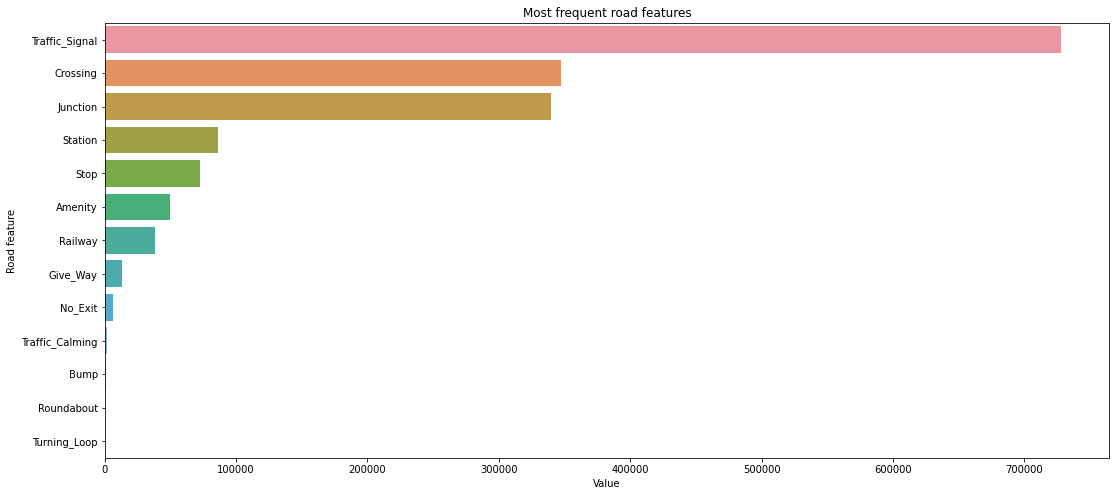

In [14]:
road_feat = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
data = df[road_feat].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

As we can see, most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present.

The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

# Weather condition histogram

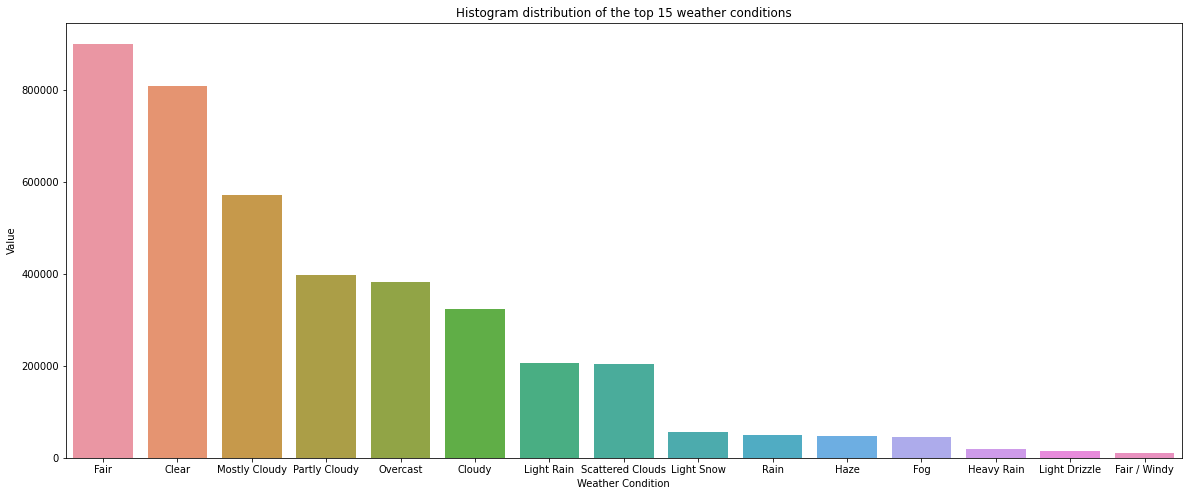

In [15]:
counts = df["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

In most frequent cases the weather condition is clear.

# Number of accidents for weekday

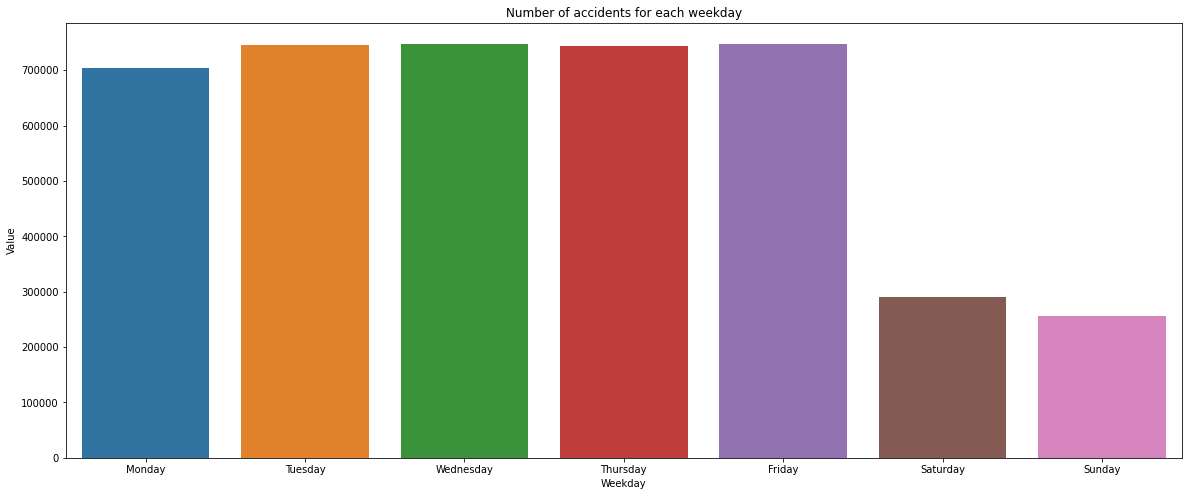

In [16]:
counts = pd.to_datetime(df['Start_Time']).dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(counts.index, counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

As we can see from the plot above, the days with the most accidents are working days, while in the weekend we have a frequency of at least 2/3 less. This may be due to the fact that during the weekend there are fewer cars on the road.

# Droping unwanted features

We are going to drop the following features:

ID, Source: since they dont carry any information for the severity

TMC: because it could already contains information about the accident severity

Start_Time: because it was decomposed by the time features added before (day, month, weekday)

End_Time: beause we cannot know in advance when the traffic flow will become regular again

Start_Lat, Start_Lng, End_Lat, End_Lng: beause we cannot know latitude and longitude 

Description: most description only report the name of the road of the accident, and so we decided to omit this feature

Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened

Timezone, Airport_Code, Weather_Timestamp, Wind_Chill(F): because they are not useful for our task

Turning_Loop: since its always false

Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

Amenity,Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal: because most of the values are false.

In [17]:
features = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number", 
            "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", 
            "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight",
            "Start_Lat","Start_Lng","Amenity","Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", 
            "Roundabout", "Station", "Stop", 
            "Traffic_Calming", "Traffic_Signal"]
df = df.drop(features, axis=1)

In [18]:
df

,Severity,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Civil_Twilight
0,3,0.010,R,Dayton,36.9,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,Night
1,2,0.010,L,Reynoldsburg,37.9,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,Night
2,2,0.010,R,Williamsburg,36.0,100.0,29.67,10.0,SW,3.5,NaN,Overcast,Night
3,3,0.010,R,Dayton,35.1,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,Day
4,2,0.010,R,Dayton,36.0,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,2,0.543,R,Riverside,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,Day
4232537,2,0.338,R,San Diego,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,Day
4232538,2,0.561,R,Orange,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,Day
4232539,2,0.772,R,Culver City,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,Day


# Drop duplicates

We are going to check if there are some duplicates in the dataset.

In [19]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 4232541
Number of rows after drop of duplicates: 3637102


# Correlation

<AxesSubplot:>

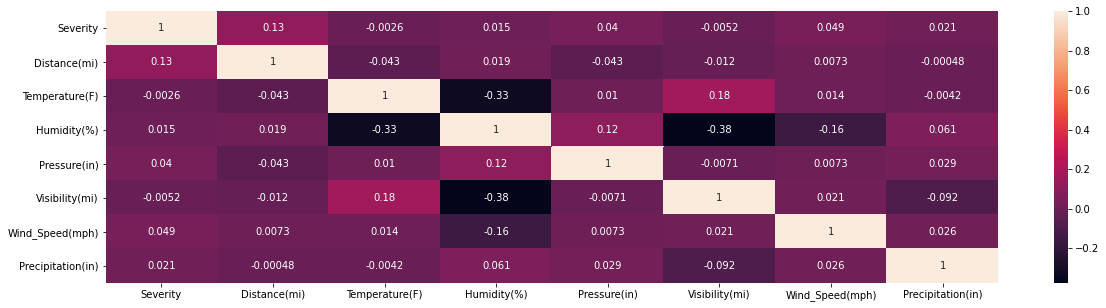

In [20]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

# Handling   missing values

In [21]:
df["Side"].value_counts()

R    2972783
L     664318
           1
Name: Side, dtype: int64

In [22]:
df = df[df["Side"] != " "]
df["Side"].value_counts()

R    2972783
L     664318
Name: Side, dtype: int64

In [23]:
df[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,3606182.00,3586383.00
mean,29.70,9.10
std,0.86,2.84
min,0.00,0.00
25%,29.66,10.00
50%,29.93,10.00
75%,30.08,10.00
max,58.04,140.00


We can see that the minimum value is 0, meaning that some records are missing replaced by putting zeros. For this reason, we are going to drop the records with missing values for these two columns.

In [24]:
df = df[df["Pressure(in)"] != 0]
df = df[df["Visibility(mi)"] != 0]
df[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,3603963.00,3584162.00
mean,29.70,9.11
std,0.86,2.84
min,0.02,0.06
25%,29.66,10.00
50%,29.93,10.00
75%,30.08,10.00
max,58.04,140.00


In [25]:
df["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [26]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan
print(df["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' nan 'Smoke' 'Thunderstorm' 'Sand'
 'Windy' 'Hail' 'Tornado']


In [27]:
df.isnull().sum()

Severity                   0
Distance(mi)               0
Side                       0
City                     130
Temperature(F)         42175
Humidity(%)            47040
Pressure(in)           30916
Visibility(mi)         50717
Wind_Direction         39208
Wind_Speed(mph)       395624
Precipitation(in)    1821387
Weather_Condition      51228
Civil_Twilight           134
dtype: int64

For numerical features we are going to fill the missing features with the mean, while for categorical features like City, Wind_Direction, Weather_Condition and Civil_Twilight, we are going to delete the records with missing informations.

In [28]:
df=df.fillna(df.groupby('Severity').transform('mean'))

In [29]:
df.dropna(inplace=True)

In [30]:
df.isna().sum()

Severity             0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Civil_Twilight       0
dtype: int64

In [31]:
df.describe().round(2)

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3572091.00,3572091.00,3572091.00,3572091.00,3572091.00,3572091.00,3572091.00,3572091.00
mean,2.32,0.34,61.43,65.88,29.70,9.11,7.96,0.01
std,0.54,1.66,18.50,22.62,0.86,2.83,5.04,0.12
min,1.00,0.00,-89.00,1.00,0.02,0.06,0.00,0.00
25%,2.00,0.00,49.00,50.00,29.66,10.00,5.00,0.00
50%,2.00,0.00,63.00,68.00,29.93,10.00,7.76,0.01
75%,3.00,0.09,75.00,85.00,30.08,10.00,10.40,0.01
max,4.00,441.75,189.00,100.00,58.04,140.00,984.00,25.00


In [32]:
df

,Severity,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Civil_Twilight
0,3,0.010,R,Dayton,36.9,91.0,29.68,10.0,Calm,8.441169,0.020000,Rain,Night
1,2,0.010,L,Reynoldsburg,37.9,100.0,29.65,10.0,Calm,7.762703,0.000000,Rain,Night
2,2,0.010,R,Williamsburg,36.0,100.0,29.67,10.0,SW,3.500000,0.010834,Cloudy,Night
3,3,0.010,R,Dayton,35.1,96.0,29.64,9.0,SW,4.600000,0.021829,Cloudy,Day
4,2,0.010,R,Dayton,36.0,89.0,29.65,6.0,SW,3.500000,0.010834,Cloudy,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,2,0.543,R,Riverside,86.0,40.0,28.92,10.0,W,13.000000,0.000000,Clear,Day
4232537,2,0.338,R,San Diego,70.0,73.0,29.39,10.0,SW,6.000000,0.000000,Clear,Day
4232538,2,0.561,R,Orange,73.0,64.0,29.74,10.0,SSW,10.000000,0.000000,Cloudy,Day
4232539,2,0.772,R,Culver City,71.0,81.0,29.62,10.0,SW,8.000000,0.000000,Clear,Day


# Label Encoding

In [33]:
df.columns

Index(['Severity', 'Distance(mi)', 'Side', 'City', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Civil_Twilight'],
      dtype='object')

In [34]:
l=LabelEncoder()

In [35]:
s=l.fit_transform(df["Side"])
c=l.fit_transform(df["City"])
wi=l.fit_transform(df["Wind_Direction"])
w=l.fit_transform(df["Weather_Condition"])
ci=l.fit_transform(df["Civil_Twilight"])

In [40]:
df["Side"]=s

In [41]:
df["City"]=c

In [42]:
df["Wind_Direction"]=wi

In [43]:
df["Weather_Condition"]=w

In [44]:
df["Civil_Twilight"]=ci

In [45]:
df

,Severity,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Civil_Twilight
0,3,0.010,1,2577,36.9,91.0,29.68,10.0,1,8.441169,0.020000,4,1
1,2,0.010,0,8978,37.9,100.0,29.65,10.0,1,7.762703,0.000000,4,1
2,2,0.010,1,11741,36.0,100.0,29.67,10.0,16,3.500000,0.010834,1,1
3,3,0.010,1,2577,35.1,96.0,29.64,9.0,16,4.600000,0.021829,1,0
4,2,0.010,1,2577,36.0,89.0,29.65,6.0,16,3.500000,0.010834,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,2,0.543,1,9082,86.0,40.0,28.92,10.0,20,13.000000,0.000000,0,0
4232537,2,0.338,1,9472,70.0,73.0,29.39,10.0,16,6.000000,0.000000,0,0
4232538,2,0.561,1,7943,73.0,64.0,29.74,10.0,15,10.000000,0.000000,1,0
4232539,2,0.772,1,2464,71.0,81.0,29.62,10.0,16,8.000000,0.000000,0,0


In [46]:
x = df.iloc[:500000,1:]
y = df.iloc[:500000,:1]

In [47]:
x

,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Civil_Twilight
0,0.01,1,2577,36.9,91.0,29.68,10.0,1,8.441169,0.020000,4,1
1,0.01,0,8978,37.9,100.0,29.65,10.0,1,7.762703,0.000000,4,1
2,0.01,1,11741,36.0,100.0,29.67,10.0,16,3.500000,0.010834,1,1
3,0.01,1,2577,35.1,96.0,29.64,9.0,16,4.600000,0.021829,1,0
4,0.01,1,2577,36.0,89.0,29.65,6.0,16,3.500000,0.010834,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
558960,0.00,1,1861,44.0,51.0,29.64,10.0,0,0.000000,0.000000,1,0
558961,0.00,1,10725,44.0,54.0,29.65,10.0,10,7.000000,0.000000,1,0
558962,0.00,1,5282,44.0,51.0,29.64,10.0,0,0.000000,0.000000,1,0
558963,0.00,1,10082,45.0,52.0,29.64,10.0,20,5.000000,0.000000,1,0


In [48]:
y

,Severity
0,3
1,2
2,2
3,3
4,2
...,...
558960,3
558961,3
558962,3
558963,3


# Handle Imbalanced data

In [49]:
y["Severity"].value_counts(normalize=True)*100

2    62.7186
3    37.0640
4     0.1384
1     0.0790
Name: Severity, dtype: float64

The severity attribute as we can see from the previous plot is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

In [50]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [51]:
Y["Severity"].value_counts(normalize=True)*100

1    25.0
2    25.0
3    25.0
4    25.0
Name: Severity, dtype: float64

# Train, Test data splitting

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=0)

# Scaling

In [53]:
scale=MinMaxScaler().fit(x_train)

In [54]:
x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)

In [55]:
x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)

# Model Building

In [56]:
accuracy = dict()

# XGBClassifier

In [57]:
#?XGBClassifier

In [58]:
model = XGBClassifier(n_jobs=-1)
model.fit(x_train, y_train)

[15:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred = model.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred)

0.9777153000701545

In [61]:
accuracy['XBG Classifier']=accuracy_score(y_test, y_pred)

In [62]:
y_pred1 = model.predict(x_train)

In [63]:
accuracy_score(y_train, y_pred1)

0.9810069926884267

In [64]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    219411
           2       0.96      0.97      0.97    220040
           3       0.97      0.95      0.96    219303
           4       0.99      1.00      0.99    219306

    accuracy                           0.98    878060
   macro avg       0.98      0.98      0.98    878060
weighted avg       0.98      0.98      0.98    878060



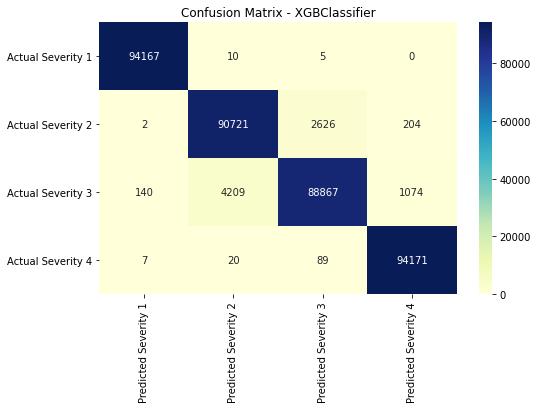

In [124]:
cm5 = confusion_matrix(y_test, y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix5 = pd.DataFrame(data=cm5, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix5, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

# Logistics Regression

In [65]:
#?LogisticRegression

In [66]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid = GridSearchCV(lr, params, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [67]:
print(grid.best_params_)

{'solver': 'liblinear'}


In [68]:
grid.best_score_

0.5610755529234904

In [69]:
LR = LogisticRegression(solver='liblinear',n_jobs=-1, random_state=42)

In [70]:
LR.fit(x_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42, solver='liblinear')

In [71]:
y_pred2 = LR.predict(x_train)

In [72]:
accuracy_score(y_train, y_pred2)

0.5628624467576248

In [73]:
y_pred3 = LR.predict(x_test)

In [74]:
y_pred3

array([3, 3, 2, ..., 3, 3, 3], dtype=int64)

In [75]:
accuracy_score(y_test, y_pred3)

0.5633915474393588

In [76]:
accuracy['Logistics Regression']=accuracy_score(y_test, y_pred3)

In [77]:
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           1       0.67      0.60      0.64    219411
           2       0.51      0.12      0.20    220040
           3       0.41      0.84      0.55    219303
           4       0.85      0.69      0.76    219306

    accuracy                           0.56    878060
   macro avg       0.61      0.56      0.54    878060
weighted avg       0.61      0.56      0.54    878060



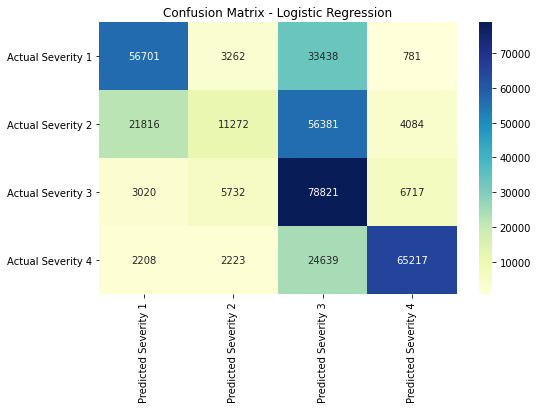

In [78]:
cm = confusion_matrix(y_test, y_pred3)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=cm, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Decision Tree

In [79]:
DT = DecisionTreeClassifier(random_state=100)
params = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid1 = GridSearchCV(DT, params, n_jobs=-1)
grid1.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}])

In [80]:
grid1.best_params_

{'criterion': 'entropy', 'max_depth': 30}

In [81]:
#?DecisionTreeClassifier

In [82]:
DT1=DecisionTreeClassifier(criterion='entropy', max_depth=30)
DT1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [83]:
y_pred4 = DT1.predict(x_train)

In [84]:
accuracy_score(y_train, y_pred4)

0.995318087602214

In [85]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    219411
           2       0.99      0.99      0.99    220040
           3       0.99      0.99      0.99    219303
           4       1.00      1.00      1.00    219306

    accuracy                           1.00    878060
   macro avg       1.00      1.00      1.00    878060
weighted avg       1.00      1.00      1.00    878060



In [86]:
y_pred5 = DT1.predict(x_test)

In [87]:
accuracy_score(y_test, y_pred5)

0.9708911754076405

In [88]:
accuracy['Decision Tree']=accuracy_score(y_test, y_pred5)

In [89]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     94182
           2       0.95      0.95      0.95     93553
           3       0.95      0.94      0.94     94290
           4       0.99      1.00      0.99     94287

    accuracy                           0.97    376312
   macro avg       0.97      0.97      0.97    376312
weighted avg       0.97      0.97      0.97    376312



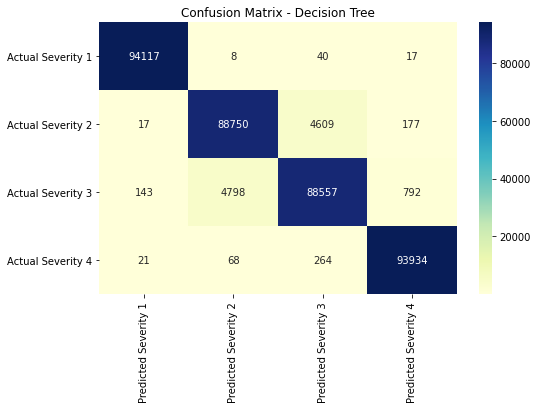

In [90]:
cm1 = confusion_matrix(y_test, y_pred5)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix1 = pd.DataFrame(data=cm1, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

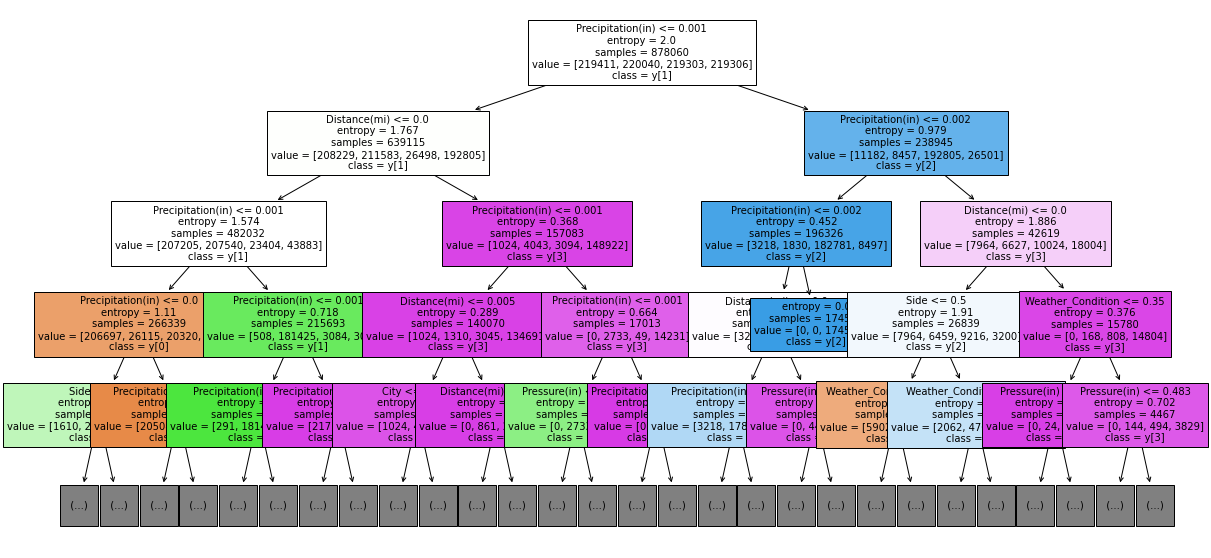

In [91]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(DT1, max_depth=4, fontsize=10, feature_names=x_train.columns.to_list(), class_names = True, filled=True)
plt.show()

# Random Forest

In [92]:
#?RandomForestClassifier

In [93]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth=30,n_jobs=-1)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_jobs=-1)

In [94]:
y_pred6 = classifier.predict(x_train)

In [95]:
accuracy_score(y_train, y_pred6)

0.9991185112634672

In [96]:
print(classification_report(y_train, y_pred6))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    219411
           2       1.00      1.00      1.00    220040
           3       1.00      1.00      1.00    219303
           4       1.00      1.00      1.00    219306

    accuracy                           1.00    878060
   macro avg       1.00      1.00      1.00    878060
weighted avg       1.00      1.00      1.00    878060



In [97]:
y_pred7 = classifier.predict(x_test)

In [98]:
accuracy_score(y_test, y_pred7)

0.9759082888666851

In [99]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     94182
           2       0.95      0.96      0.96     93553
           3       0.96      0.95      0.95     94290
           4       0.99      1.00      1.00     94287

    accuracy                           0.98    376312
   macro avg       0.98      0.98      0.98    376312
weighted avg       0.98      0.98      0.98    376312



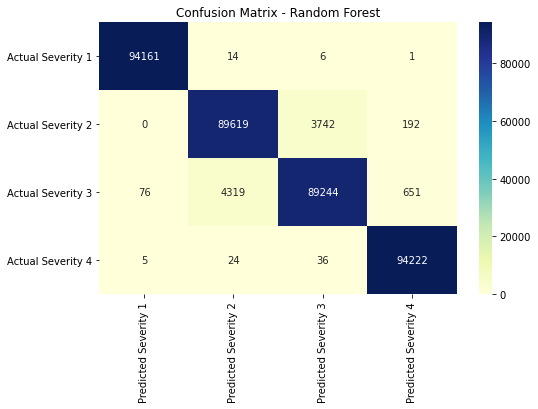

In [117]:
cm2 = confusion_matrix(y_test, y_pred7)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix2 = pd.DataFrame(data=cm2, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [100]:
accuracy['Random Forest']=accuracy_score(y_test, y_pred7)

# Gaussian Naive Bayes

In [101]:
gauss=GaussianNB()
gauss.fit(x_train,y_train)

GaussianNB()

In [102]:
y_pred8 = gauss.predict(x_train)

In [103]:
accuracy_score(y_train, y_pred8)

0.4350693574470993

In [104]:
y_pred9 = gauss.predict(x_test)

In [105]:
accuracy_score(y_test, y_pred9)

0.43567305852590404

In [118]:
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           1       0.34      0.95      0.51     94182
           2       0.40      0.09      0.15     93553
           3       0.26      0.06      0.10     94290
           4       0.83      0.63      0.72     94287

    accuracy                           0.44    376312
   macro avg       0.46      0.44      0.37    376312
weighted avg       0.46      0.44      0.37    376312



In [106]:
accuracy['Gaussian Naive Bayes']=accuracy_score(y_test, y_pred9)

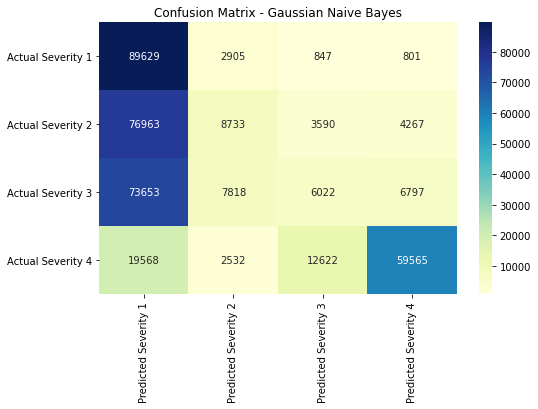

In [120]:
cm3 = confusion_matrix(y_test, y_pred9)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix3 = pd.DataFrame(data=cm3, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

# MLPClassifer

mlp = MLPClassifier(random_state=42)
parameters = [{"hidden_layer_sizes": [(64, 32), (32, 64, 32)], "max_iter": [200], "solver": ["sgd", "adam"], 
               "activation": ["tanh", "relu"]}]
grid2 = GridSearchCV(mlp, parameters, n_jobs=-1)

grid2.fit(x_train,y_train)

grid2.best_params_

y_pred10=grid2.predict(x_test)

In [109]:
mlp = MLPClassifier(random_state=42,hidden_layer_sizes=(64, 32), activation='relu',solver='adam')
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42)

In [108]:
?MLPClassifier

In [110]:
y_pred10 = mlp.predict(x_train)

In [111]:
accuracy_score(y_train, y_pred10)

0.9416588843586998

In [112]:
y_pred11 = mlp.predict(x_test)

In [113]:
accuracy_score(y_test, y_pred11)

0.9414581517464232

In [119]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98     94182
           2       0.91      0.93      0.92     93553
           3       0.94      0.89      0.91     94290
           4       0.93      0.97      0.95     94287

    accuracy                           0.94    376312
   macro avg       0.94      0.94      0.94    376312
weighted avg       0.94      0.94      0.94    376312



In [114]:
accuracy['MLPClassifier']=accuracy_score(y_test, y_pred11)

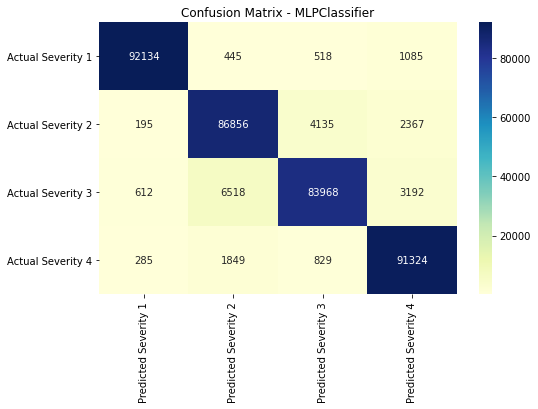

In [122]:
cm4 = confusion_matrix(y_test, y_pred11)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix4 = pd.DataFrame(data=cm4, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - MLPClassifier")
plt.show()

# Accuracy

In [116]:
accuracy

{'XBG Classifier': 0.9777153000701545,
 'Logistics Regression': 0.5633915474393588,
 'Decision Tree': 0.9708911754076405,
 'Random Forest': 0.9759082888666851,
 'Gaussian Naive Bayes': 0.43567305852590404,
 'MLPClassifier': 0.9414581517464232}

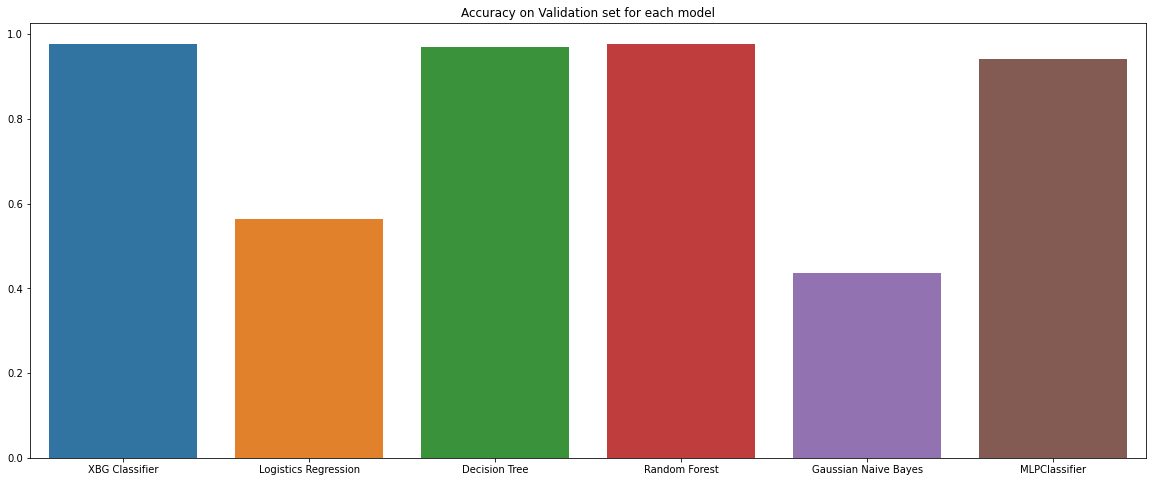

In [115]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()